# 1D heat transfer

# $ \rho \frac{\partial  h }{\partial t} + G \frac{\partial h}{\partial z}  =\frac{P}{A_c}q''_w$

In [1]:
#use this package to plot the results
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
cd(dirname(pwd()))
cd("src")
include("Tools.jl")
include("FiniteDifference.jl")
include("TimeMarching.jl")
include("Initial.jl")
include("Systems.jl")
include("BoundaryCondition.jl")

using ..Tools
using ..FiniteDifference
using ..TimeMarching
using ..Initial
using ..Systems
using ..BoundaryCondition
pwd()

"C:\\Users\\liyux\\github\\thermo-network\\src"

## Construct the impluse system containing parameters

In [3]:
# t and z interval
Δt=0.005
Δz=0.01
# the maximum t and z
tmax=2
zmax=2

# parameters
ρ=1;
G=1;
P=1;
Ac=1; # unreal
qw=1;

impulsesystem=Systems.ImpulseSystem(ρ,G,P,Ac,qw,Δt,Δz)

ImpulseSystem(1, 1, 1, 1, 1, 0.005, 0.01)

## Initialize many empty tuples of arrays for future use

In [4]:
# initializing many empty tuples of arrays
ztotal=Δz:Δz:zmax
ttotal=Δt:Δt:tmax
h=[]
htotal=[]
hanalytical=[]
hanalyticaltotal=[]
t=[]

0-element Array{Any,1}

## Initialize the state vector h

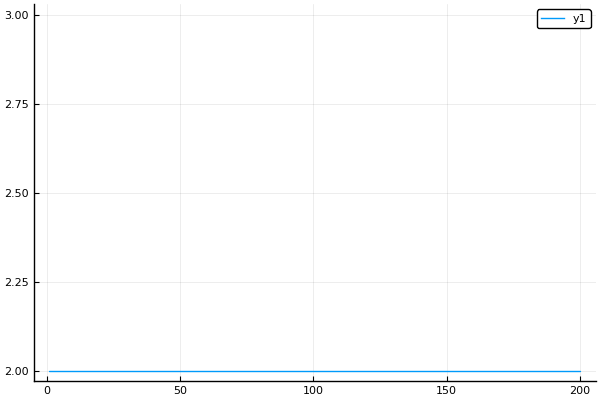

In [5]:
#initialization of finlet and foutlet
hinlet=2
houtlet=0.001*P/Ac*qw;

#initialization of f
h = deepcopy(zeros(length(ztotal))).+hinlet
plot(h)

## Time marching

In [6]:
# start time marching

 for ti in ttotal
 
 # numerical part
 h[1]=hinlet
 t,h=TimeMarching.upwindrk1!(t,h,impulsesystem)
 push!(htotal,h)

 # analytical part (I did not pay much attention to revising this part cause I feel this part will not be common for the codes in the future)
 hanalytical=hinlet.+P*qw/Ac/ρ*ti.+P*qw/Ac/G.*(ztotal.-G/ρ*ti).*heaviside.(G/ρ*ti.-ztotal)
 push!(hanalyticaltotal,hanalytical)
    
end
# finished

## Plotting

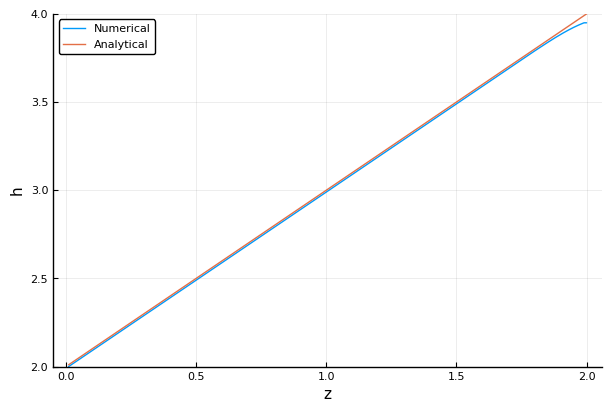

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\github\thermo-network\src\tmp.gif
└ @ Plots C:\Users\liyux\.juliapro\JuliaPro_v1.3.1-2\packages\Plots\B2J6j\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\liyux\\github\\thermo-network\\src\\tmp.gif")
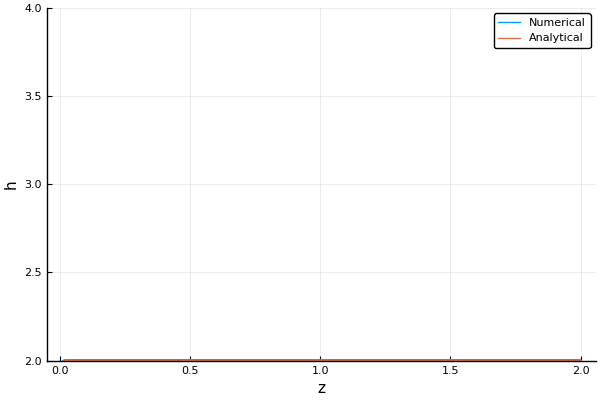

In [7]:
@gif for i in 1:length(htotal)
    
    plot(ztotal,htotal[i],ylim=(hinlet,hanalyticaltotal[end][end]),xlabel="z",ylabel="h",label="Numerical")
    plot!(ztotal,hanalyticaltotal[i],ylim=(hinlet,hanalyticaltotal[end][end]),xlabel="z",ylabel="h",label="Analytical")
    
end